In [1]:
import altair as alt
alt.renderers.enable('notebook')

import folium, branca, vincent, json
from vega_datasets import data
import pandas as pd, numpy as np


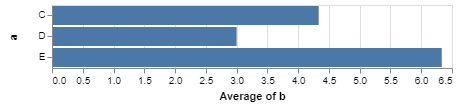

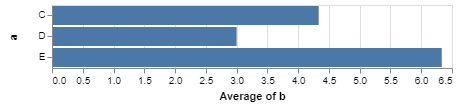

In [2]:
data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
ch=alt.Chart(data).mark_bar().encode(
    y='a',
    x='average(b)'
)
ch.save('chart.json')
ch

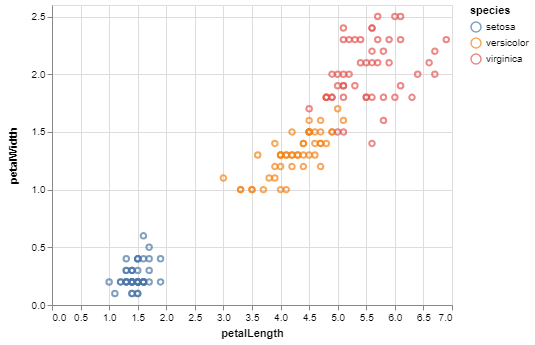

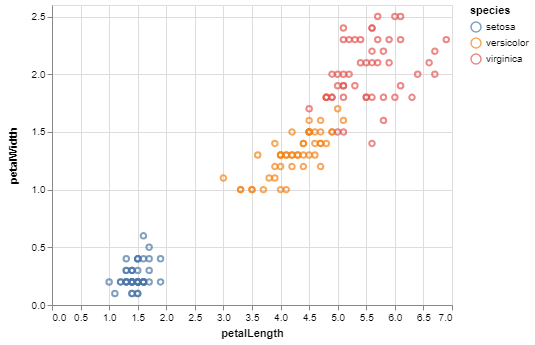

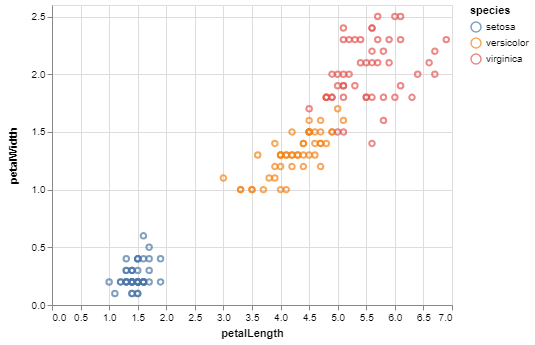

In [64]:
# for the notebook only (not for JupyterLab) run this command once per session

iris = data.iris()

alt.Chart(iris).mark_point().encode(
    x='petalLength',
    y='petalWidth',
    color='species'
)

In [3]:
import pandas as pd


In [17]:
df = data.seattle_weather()
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


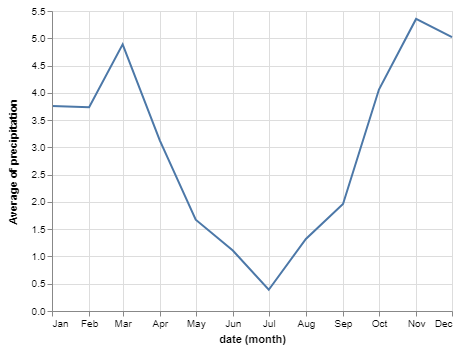

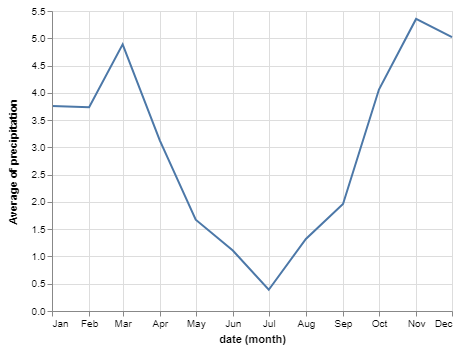

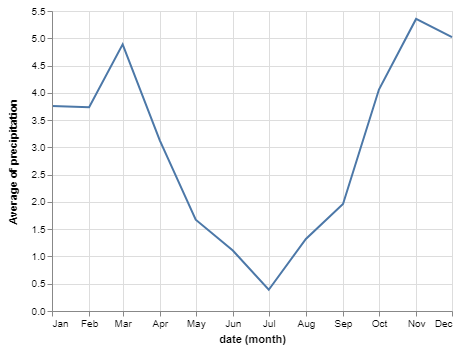

In [26]:
alt.Chart(df).mark_line().encode(
    x='month(date):T',
    y='average(precipitation)'
)

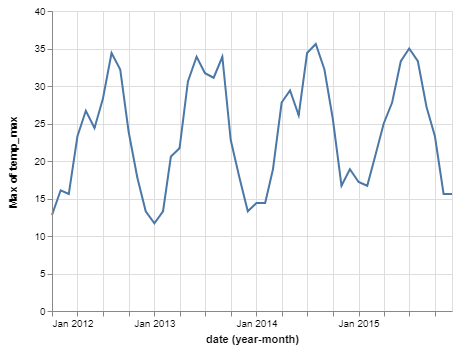

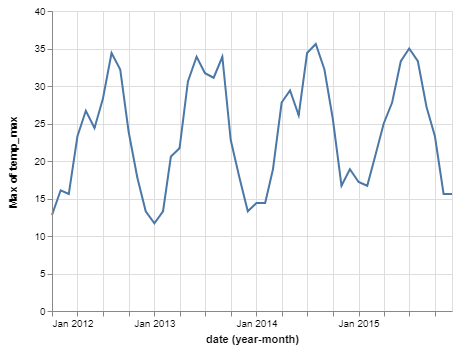

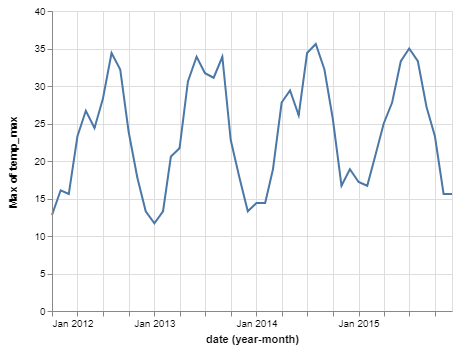

In [30]:
alt.Chart(df).mark_line().encode(
    x='yearmonth(date):T',
    y='max(temp_max)',
)

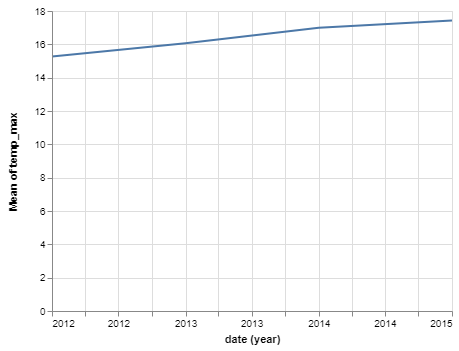

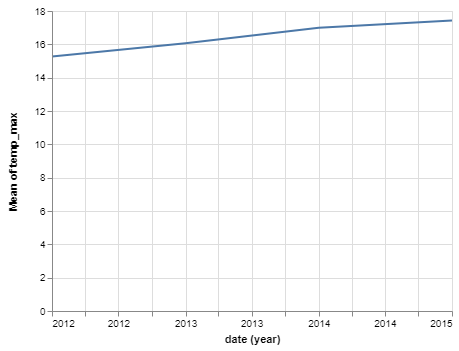

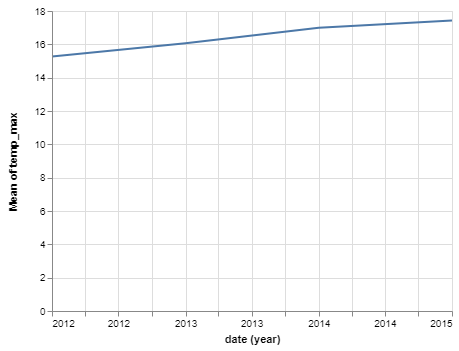

In [31]:
alt.Chart(df).mark_line().encode(
    x='year(date):T',
    y='mean(temp_max)',
)

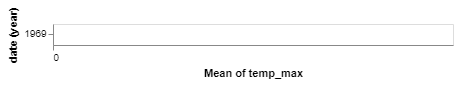

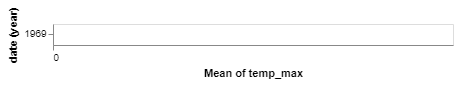

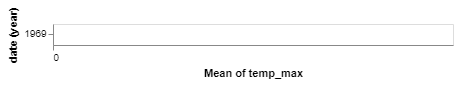

In [70]:
ch = alt.Chart(df).mark_bar().encode(
    x='mean(temp_max):Q',
    y='year(date):O'
)
ch.save('chart.json')
ch

In [3]:
m = folium.Map(
    location=[46.3014, -123.7390],
    zoom_start=7,
    tiles='Stamen Terrain'
)

data = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})
list_data = [10, 20, 30, 20, 15, 30, 45]
line = vincent.Line(list_data, width=150, height=150)
line.axis_titles(x='Index', y='Value')
# print(line.to_json())
folium.Marker(
    location=[47.3489, -123.708],
    popup=folium.Popup(max_width=250).add_child(
        folium.Vega(line, width=250, height=250))
).add_to(m)
m.save(outfile='vincent.html')

In [ ]:
scatter_points = {
    'x': np.random.uniform(size=(30,)),
    'y': np.random.uniform(size=(30,)),
}

# Let's create the vincent chart.
scatter_chart = vincent.Scatter(scatter_points,
                                iter_idx='x',
                                width=400,
                                height=300)

# Let's convert it to JSON.
scatter_json = scatter_chart.to_json()

#altair chart
df = pd.DataFrame({'a': list('CCCDDDEEE'),
                     'b': [2, 7, 4, 1, 2, 6, 8, 4, 7]})